In [100]:
import pandas as pd

In [101]:
train_df=pd.read_csv('nlp_start/train.csv')
test_df=pd.read_csv('nlp_start/test.csv')

In [102]:
train_df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [103]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [104]:
train_df.shape

(7613, 5)

In [105]:
train_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [106]:
train_shuffle=train_df.sample(frac=1,random_state=49) 
train_shuffle.head(20)

,id,keyword,location,text,target
74,107,accident,North Carolina,I-77 Mile Marker 31 South Mooresville Iredell...,1
5387,7687,panic,Toronto,tomorrow's going to be a year since I went to ...,1
4259,6051,heat%20wave,"Arnhem, the Netherlands",Arnhem Weather - &lt;p&gt;An unrelenting and d...,1
2119,3045,death,Home of the Takers.,Y'all PUSSSSSSSSSY AND SHOOOK TO DEATH OF ME,0
6078,8684,sinkhole,"Haddonfield, NJ",Georgia sinkhole closes road swallows whole po...,1
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
2118,3044,death,Carry On Jutta!!!,Afghan peace talks in doubt after Mullah Omar'...,0
3931,5589,flood,NaN,Internet basics: the flood defective intertiss...,1
530,770,avalanche,South Central Wales,I saw two great punk bands making original mus...,0
4186,5947,hazard,a van down by the river,@phiddleface NOT IF THERES A CHOKING HAZARD!!!...,0


In [107]:
print(f"Total train samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total  samples: {len(train_df)+len(test_df)}")

Total train samples: 7613
Total test samples: 3263
Total  samples: 10876


In [108]:
import random

random_index=random.randint(0, len(train_df)-4)

for row in train_shuffle[['text','target']][random_index:random_index+4].itertuples():
    print(row)


Pandas(Index=124, text='&gt;&gt; $15 Aftershock : Protect Yourself and Profit in the Next Global Financial... ##book http://t.co/f6ntUc734Z\n@esquireattire', target=0)
Pandas(Index=4509, text='My back is so sunburned :(', target=1)
Pandas(Index=1101, text="The majority of those killed were civilians on the ground after the jet first bombed the city's main street then dramatically plummeted", target=1)
Pandas(Index=4391, text='#hot  Funtenna: hijacking computers to send data as sound waves [Black Hat 2015] http://t.co/gUJNPLJVvt #prebreak #best', target=0)


In [109]:
from sklearn.model_selection import train_test_split

train_sentences, test_sentences, train_labels,test_labels = train_test_split(
    train_shuffle['text'].to_numpy(),
    train_shuffle['target'].to_numpy(),
    test_size=0.1, 
    random_state=49
)

In [110]:
train_sentences.dtype, train_labels.dtype

(dtype('O'), dtype('int64'))

In [111]:
len(train_sentences), len(test_sentences)

(6851, 762)

In [112]:
import tensorflow as tf 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [113]:
text_vectorizer = TextVectorization(max_tokens=10000, 
                                    standardize="lower_and_strip_punctuation", 
                                    output_sequence_length=15)

In [114]:
text_vectorizer.adapt(train_sentences)

In [115]:
sample_sentense="I Love Tensorflow"

text_vectorizer([sample_sentense])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8, 107,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [116]:
words = text_vectorizer.get_vocabulary()



In [117]:
from tensorflow.keras.layers import Embedding

In [118]:
embedding = Embedding(
                        input_dim=10000, 
                        output_dim=128, 
                        input_length=15, 
                        name = 'embeding_1'
)

In [119]:
embedding

In [120]:
sample_embed = embedding(text_vectorizer("I Love Tensorflow"))
sample_embed

<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
array([[ 0.04439883, -0.04619297, -0.01642685, ...,  0.01531443,
        -0.03856146,  0.01436304],
       [ 0.03134639, -0.03798255,  0.00517402, ...,  0.02851358,
         0.01606515,  0.02540446],
       [-0.01994232, -0.01697376, -0.04062308, ...,  0.02972974,
         0.02355332,  0.0129374 ],
       ...,
       [ 0.02325957, -0.01965468, -0.04953413, ..., -0.04274379,
         0.02890572, -0.04171618],
       [ 0.02325957, -0.01965468, -0.04953413, ..., -0.04274379,
         0.02890572, -0.04171618],
       [ 0.02325957, -0.01965468, -0.04953413, ..., -0.04274379,
         0.02890572, -0.04171618]], dtype=float32)>

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 3 start

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [123]:
model_0= Pipeline([ 
    ("tfidf",TfidfVectorizer()), 
    ("clf", MultinomialNB())
])

In [124]:
model_0.fit(train_sentences,train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [125]:
baseline_score= model_0.score(test_sentences,test_labels)

baseline_score

0.8097112860892388

In [126]:
y_hat0=model_0.predict(test_sentences)

In [127]:
test_labels[:10], y_hat0[:10]

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64))

In [128]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [129]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

In [130]:
test_sentences.dtype

dtype('O')

In [131]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")


In [132]:
model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [133]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [134]:
model_1_history = model_1.fit(train_sentences, train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 4s 16ms/step - loss: 0.6131 - accuracy: 0.6977 - val_loss: 0.5216 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4451 - accuracy: 0.8189 - val_loss: 0.4434 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3508 - accuracy: 0.8587 - val_loss: 0.4226 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2878 - accuracy: 0.8897 - val_loss: 0.4299 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2410 - accuracy: 0.9114 - val_loss: 0.4466 - val_accuracy: 0.7953


In [135]:
model_1.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7953


[0.4465690851211548, 0.7952755689620972]

In [136]:
res_model_1=pd.DataFrame(model_1_history.history)

<AxesSubplot:>

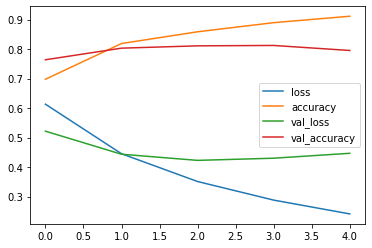

In [137]:
res_model_1.plot()

In [138]:
test_labels.shape

(762,)

In [139]:
y_hat1=model_1.predict(test_sentences)

In [140]:
y_hat1=tf.squeeze(tf.round(y_hat1))

In [141]:
test_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [142]:
calculate_results(test_labels,y_hat1)

{'accuracy': 79.52755905511812,
 'precision': 0.7941792245085477,
 'recall': 0.7952755905511811,
 'f1': 0.7942709523471922}

In [143]:
calculate_results(test_labels,y_hat0)

{'accuracy': 80.97112860892388,
 'precision': 0.8184785838596061,
 'recall': 0.8097112860892388,
 'f1': 0.8032877870568117}

#### finish previous lection

------------------------------------------------------------------------------------------------


## Lection 4 start

In [144]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [145]:
model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [146]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [147]:
model_2_history = model_2.fit(
                                train_sentences,train_labels, 
                                epochs=5, 
                                validation_data=(test_sentences,test_labels)
)

Epoch 1/5
215/215 [==============================] - 7s 23ms/step - loss: 0.2234 - accuracy: 0.9199 - val_loss: 0.5151 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1573 - accuracy: 0.9421 - val_loss: 0.4939 - val_accuracy: 0.7966
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1277 - accuracy: 0.9517 - val_loss: 0.7046 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1067 - accuracy: 0.9603 - val_loss: 0.7333 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0927 - accuracy: 0.9634 - val_loss: 0.6724 - val_accuracy: 0.7690


In [148]:
model_2.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.6724 - accuracy: 0.7690


[0.6723933219909668, 0.7690288424491882]

In [149]:
y_hat2=model_2.predict(test_sentences)

y_hat2[:10]

array([[0.99713373],
       [0.6888982 ],
       [0.00127205],
       [0.71156526],
       [0.80665827],
       [0.27344805],
       [0.2737149 ],
       [0.10652646],
       [0.52358824],
       [0.9997816 ]], dtype=float32)

In [150]:
y_hat2=tf.squeeze(tf.round(y_hat2))

y_hat2

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [151]:
calculate_results(test_labels,y_hat2),calculate_results(test_labels,y_hat1),calculate_results(test_labels,y_hat0)

({'accuracy': 76.9028871391076,
  'precision': 0.7674056700359263,
  'recall': 0.7690288713910761,
  'f1': 0.7668105650181832},
 {'accuracy': 79.52755905511812,
  'precision': 0.7941792245085477,
  'recall': 0.7952755905511811,
  'f1': 0.7942709523471922},
 {'accuracy': 80.97112860892388,
  'precision': 0.8184785838596061,
  'recall': 0.8097112860892388,
  'f1': 0.8032877870568117})

In [152]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64)(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs,outputs,name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [153]:
model_3.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [154]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_3.fit(train_sentences,train_labels, 
            epochs=5, 
            validation_data=(test_sentences,test_labels)           

)

Epoch 1/5
215/215 [==============================] - 10s 32ms/step - loss: 0.1622 - accuracy: 0.9396 - val_loss: 0.6813 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0866 - accuracy: 0.9708 - val_loss: 0.7805 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0730 - accuracy: 0.9747 - val_loss: 0.9033 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 7s 35ms/step - loss: 0.0667 - accuracy: 0.9749 - val_loss: 0.9255 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0568 - accuracy: 0.9774 - val_loss: 1.1108 - val_accuracy: 0.7572


In [156]:
model_3.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 3ms/step - loss: 1.1108 - accuracy: 0.7572


[1.1107892990112305, 0.7572178244590759]

In [157]:
y_hat3 = model_3.predict(test_sentences)

y_hat3[:10]

array([[9.9975771e-01],
       [9.8281848e-01],
       [5.2856347e-05],
       [8.9780986e-03],
       [9.2713451e-01],
       [6.6024089e-01],
       [9.1547370e-03],
       [6.4181918e-01],
       [1.6080022e-02],
       [9.9987364e-01]], dtype=float32)

In [158]:
y_hat3=tf.squeeze(tf.round(y_hat3))

y_hat3

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0

In [159]:
calculate_results(test_labels,y_hat3)

{'accuracy': 75.7217847769029,
 'precision': 0.7554809637895007,
 'recall': 0.7572178477690289,
 'f1': 0.755641059575419}

In [160]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(16))(x)
print(x.shape)
outputs = layers.Dense(1,activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs,outputs,name="model_4_Bidirectional_LSTM")

(None, 15, 128)
(None, 32)


In [161]:
model_4.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["accuracy"]
)

In [162]:
model_4.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embeding_1 (Embedding)       (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,298,593
Trainable params: 1,298,593
Non-trainable params: 0
_________________________________________________________________


In [163]:
model_4.fit(train_sentences,train_labels,epochs=5, 
validation_data=(test_sentences,test_labels))

Epoch 1/5
215/215 [==============================] - 9s 25ms/step - loss: 0.1657 - accuracy: 0.9561 - val_loss: 0.7628 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0669 - accuracy: 0.9755 - val_loss: 0.8384 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 7s 35ms/step - loss: 0.0536 - accuracy: 0.9791 - val_loss: 0.9268 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 7s 35ms/step - loss: 0.0453 - accuracy: 0.9809 - val_loss: 1.1272 - val_accuracy: 0.7533
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0418 - accuracy: 0.9797 - val_loss: 1.1349 - val_accuracy: 0.7559


In [164]:
model_4.evaluate(test_sentences,test_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.1349 - accuracy: 0.7559


[1.1348850727081299, 0.7559055089950562]

In [165]:
y_hat4 = model_4.predict(test_sentences)

In [166]:
y_hat4=tf.squeeze(tf.round(y_hat4))

y_hat4[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 1., 0., 0., 0., 0., 1.], dtype=float32)>

In [167]:
calculate_results(test_labels,y_hat4)

{'accuracy': 75.59055118110236,
 'precision': 0.7544868769441311,
 'recall': 0.7559055118110236,
 'f1': 0.7548559139085943}